# Mathematics Lesson for Machine Learning Assignment 2, Question of going down Mt. Fuji

## Support libraries and functions

In [14]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

fuji = pd.read_csv('https://raw.githubusercontent.com/xdtn7/diveintocode-ml/master/mtfuji_data.csv')

In [56]:
def ans(msg, indent=1, width=None, title=None):
    msg = " ANSWER: " + str(msg) + "  "
    lines = msg.split('\n')
    space = " " * indent
    if not width:
        width = max(map(len, lines))
    box = f'╔{"═" * (width + indent * 2)}╗\n'
    if title:
        box += f'║{space}{title:<{width}}{space}║\n'  # title
        box += f'║{space}{"-" * len(title):<{width}}{space}║\n'  # underscore
    box += ''.join([f'║{space}{line:<{width}}{space}║\n' for line in lines])
    box += f'╚{"═" * (width + indent * 2)}╝'  # lower_border
    print("\n"+box)

## [Problem 1] Visualization of data

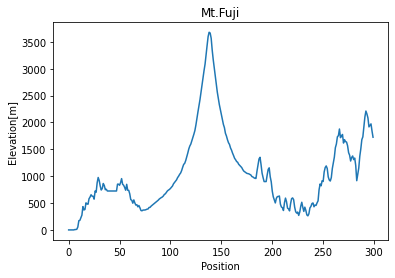

In [5]:

plt.title("Mt.Fuji")
plt.xlabel("Position")
plt.ylabel("Elevation[m]")
plt.plot(fuji.iloc[:, 0], fuji.iloc[:, 3])
plt.show()

## [Problem 2] Create a function to calculate the slope of a point

In [17]:
def compute_gradient(data, x, last_x):
    try:
        with warnings.catch_warnings():
            warnings.simplefilter('ignore') 
            return (data.iloc[x, 3] - data.iloc[last_x, 3])/(data.iloc[x, 0] - data.iloc[last_x, 0])
    except ZeroDivisionError as err:
        return 0
    

In [20]:
#Example
ans("The slope at point 10 in the csv file is {}".format(compute_gradient(fuji, 10, 11))) 


╔═══════════════════════════════════════════════════════════════════════╗
║  ANSWER: The slope at point 10 in the csv file is 6.280000000000001   ║
╚═══════════════════════════════════════════════════════════════════════╝


## [Problem 3] Create a function to calculate the destination

In [51]:
def compute_destination(x, gradient, direction, alpha):
    try:
        return (round(x - abs(alpha*gradient)) if round(x - abs(alpha*gradient)) > 0  else 0) if direction else ((round(x + abs(alpha*gradient)) if round(x + abs(alpha*gradient)) < 299 else 299))
    except ValueError:
        return (x - 1 if x > 1 else 0) if direction else (x + 1 if x < 298 else 299)

## [Problem 4] Creating a function to go down the mountain

In [53]:
def go_down_Fuji(data, x, alpha):
    last_x = x + 1
    y = data.iloc[x, 3]
    direction = True if x < np.argmax(data.iloc[:, 3]) else False
    x_list = [x]
    y_list = [y]
    gradient_list = []
    while True:
      gradient = compute_gradient(data, x, last_x)
      last_x = x
      x = compute_destination(x, gradient, direction, alpha)
      y = data.iloc[x, 3]
      x_list.append(x)
      y_list.append(y)
      gradient_list.append(gradient)
      if y <= 0 or x <= 0 or x >= 299: 
        gradient_list.append(0)
        return np.column_stack((x_list, y_list, gradient_list))


In [57]:
#Execute
alpha1 = 0.2
location1 = go_down_Fuji(fuji, 136, alpha1)
ans(location1)


╔═════════════════════════════════════════════════════════════╗
║  ANSWER: [[ 1.36000000e+02  3.43459000e+03  1.65490000e+02] ║
║  [ 1.03000000e+02  8.58620000e+02  7.80596970e+01]          ║
║  [ 8.70000000e+01  5.36540000e+02  2.01300000e+01]          ║
║  [ 8.30000000e+01  4.71820000e+02  1.61800000e+01]          ║
║  [ 8.00000000e+01  4.20600000e+02  1.70733333e+01]          ║
║  [ 7.70000000e+01  3.86640000e+02  1.13200000e+01]          ║
║  [ 7.50000000e+01  3.71190000e+02  7.72500000e+00]          ║
║  [ 7.30000000e+01  3.68910000e+02  1.14000000e+00]          ║
║  [ 7.30000000e+01  3.68910000e+02             nan]          ║
║  [ 7.20000000e+01  3.55680000e+02  1.32300000e+01]          ║
║  [ 6.90000000e+01  4.54210000e+02 -3.28433333e+01]          ║
║  [ 6.20000000e+01  5.52230000e+02 -1.40028571e+01]          ║
║  [ 5.90000000e+01  7.36480000e+02 -6.14166667e+01]          ║
║  [ 4.70000000e+01  7.24500000e+02  9.98333333e-01]          ║
║  [ 4.70000000e+01  7.24500000e+02    

## [Problem 5] Visualization of the descent process

In [58]:
def plot_graph(data):
  plt.title("Mt.Fuji")
  plt.xlabel("Position")
  plt.ylabel("Elevation[m]")
  plt.scatter(data[:, 0], data[:, 1],c = 'r')
  plt.plot(data[:, 0], data[:, 1], 'r', label = 'Caculated positions')
  plt.plot(fuji.iloc[:, 0], fuji.iloc[:, 3], label = 'Real positions')
  plt.legend(loc = 'upper left')
  plt.xlim(np.min(fuji.iloc[:, 0]), np.max(fuji.iloc[:, 0]))
  plt.ylim(np.min(fuji.iloc[:, 3]), np.max(fuji.iloc[:, 3]))
  plt.show()


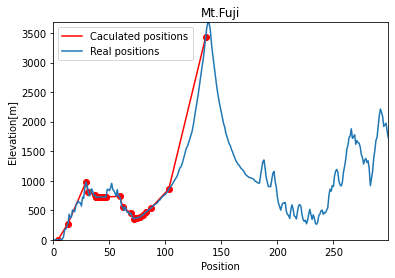

In [59]:
plot_graph(location1)

## [Problem 6] and [Problem 7] Change of initial value. Visualization of the descent process for each initial value

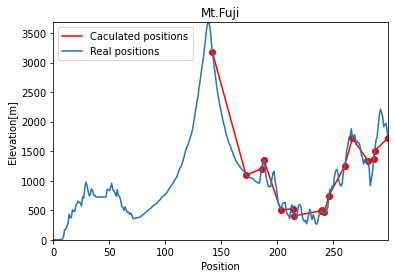

In [60]:
location2 = go_down_Fuji(fuji, 142, alpha1)
plot_graph(location2)

## Problem 8] (Advance problem) Hyperparameter change

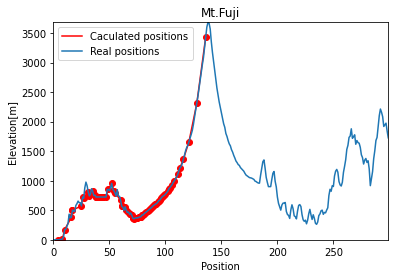

In [61]:
alpha2 = 0.05
location3 = go_down_Fuji(fuji, 136, alpha2)
plot_graph(location3)